In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import math

In [2]:
sns.set()

In [3]:
def analytic_solution(time):
    # Replace by exact values.
    q = 1
    c = 299.792458
    v0 = 0.999 * c
    B = 0.001
    gamma = 22.36627204213
    M = 0.510998910
    r = (M/c**2) * gamma * v0 / B
    # print r
    # r = 38.0854
    # T = 0.7990
    T = 2*math.pi / (B/((M/c**2) * gamma))
    # print T
    w = 2*math.pi / T
    x0 = 0.
    y0 = -r
    return (x0+r*np.sin(w*time), y0+r*np.cos(w*time))
# analytic_solution(0)

In [4]:
c = 299.792458
v = 0.999*c

In [5]:
curr_dir = '20150806/'
deltaQrel = '1e-3'

In [6]:
df_pdx = pd.read_csv(curr_dir+'pd/'+deltaQrel+'/x.csv', header = None, names = ['local_t', 'x'])
df_pdx.describe()

,local_t,x
count,16471.000000,16471.000000
mean,167.035625,0.023864
std,96.338033,18.112649
min,0.000000,-37.930300
25%,83.587450,-14.020350
50%,167.125000,0.001267
75%,250.441000,14.043800
max,333.883000,37.921400


In [7]:
pdx = df_pdx.as_matrix()

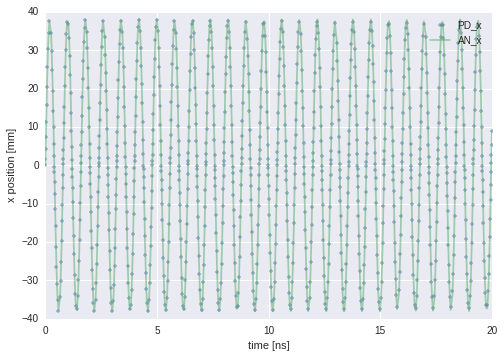

In [8]:
plt.plot(pdx[:,0], pdx[:,1], '.', label='PD_x', alpha=0.5)
plt.plot(pdx[:,0], analytic_solution(pdx[:,0])[0], label='AN_x', alpha=0.5)
plt.xlabel('time [ns]')
plt.ylabel('x position [mm]')
plt.xlim((0,20))
plt.legend()
plt.savefig(curr_dir+'PDx_vs_ANx_'+deltaQrel+'.png')

In [9]:
error_pdx = pdx[:,1] - analytic_solution(pdx[:,0])[0]
num_error_pdx = (error_pdx ** 2. ).sum() / error_pdx.size
print num_error_pdx

19.44665992


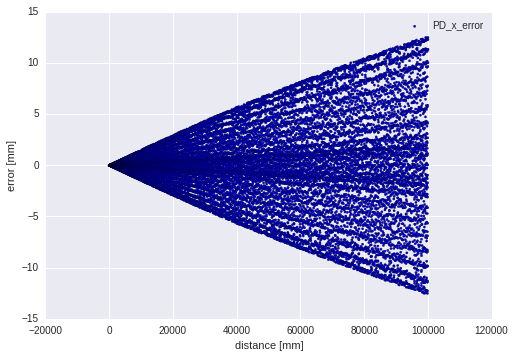

In [10]:
# Plot x_error vs distance
plt.scatter(pdx[:,0]*v, error_pdx, label='PD_x_error', marker='.')
plt.xlabel('distance [mm]')
plt.ylabel('error [mm]')
plt.legend()
plt.savefig(curr_dir+'PD_x_error_'+deltaQrel+'.png')

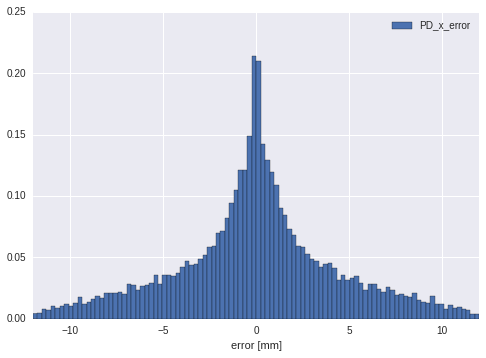

In [11]:
xlims = (-12, 12)
plt.hist(error_pdx, label='PD_x_error', bins=100, range=xlims, normed=True)
plt.xlabel('error [mm]')
plt.xlim(xlims)
plt.legend()
plt.savefig(curr_dir+'PD_x_error_hist_'+deltaQrel+'.png')

In [12]:
df_g4 = pd.read_csv(curr_dir+'g4/output.txt', sep = '\t', header = None, names = ['x', 'y', 'z', 'local_t', 'global_t', 'other_t'])
df_g4.describe()

,x,y,z,local_t,global_t,other_t
count,5001.000000,5001.000000,5001,5001.000000,5001.000000,5001.000000
mean,0.000078,-3.808743,0,0.166949,0.166949,0.007464
std,2.693368,2.693238,0,0.096417,0.096417,0.004311
min,-3.808524,-7.617049,0,0.000000,0.000000,0.000000
25%,-2.693587,-6.500411,0,0.083475,0.083475,0.003732
50%,-0.000838,-3.809782,0,0.166949,0.166949,0.007464
75%,2.692184,-1.116045,0,0.250424,0.250424,0.011197
max,3.808525,0.000000,0,0.333898,0.333898,0.014929


In [13]:
g4 = df_g4.as_matrix()
# Convert from cm to mm
g4[:,0]*=10
g4[:,1]*=10
g4[:,2]*=10
# Convert from us to ns
g4[:,3]*=10**3
g4[:,4]*=10**3
g4[:,5]*=10**3

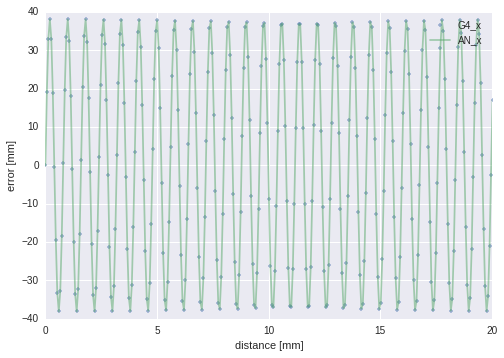

In [14]:
# Plot g4_x and analytic_x vs time
plt.plot(g4[:,3], g4[:,0], '.', label='G4_x', alpha=0.5)
plt.plot(g4[:,3], analytic_solution(g4[:,3])[0], label='AN_x', alpha=0.5)
plt.xlabel('distance [mm]')
plt.ylabel('error [mm]')
plt.xlim((0,20))
plt.legend()
plt.savefig(curr_dir+'G4x_vs_ANx.png')

In [15]:
error_g4x = g4[:,0] - analytic_solution(g4[:,3])[0]
num_error_g4x = (error_g4x ** 2. ).sum() / error_g4x.size
print num_error_g4x

0.0152572973007


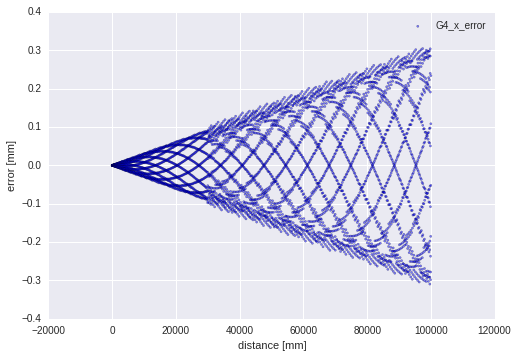

In [16]:
# Plot G4 x_error vs distance
plt.scatter(g4[:,3]*v, error_g4x, label='G4_x_error', marker='.', alpha=0.5)
plt.xlabel('distance [mm]')
plt.ylabel('error [mm]')
plt.legend()
plt.savefig(curr_dir+'G4_x_error.png')

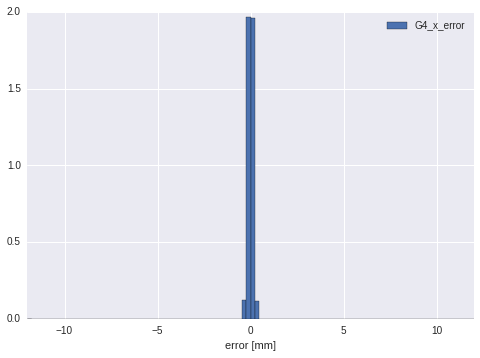

In [17]:
plt.hist(error_g4x, label='G4_x_error', bins=100, range=xlims, normed=True)
plt.xlabel('error [mm]')
plt.xlim(xlims)
plt.legend()
plt.savefig(curr_dir+'G4_x_error_hist_'+deltaQrel+'.png')

In [18]:
df_pdy = pd.read_csv(curr_dir+'pd/'+deltaQrel+'/y.csv', header = None, names = ['local_t', 'y'])
df_pdy.describe()

,local_t,y
count,12237.000000,12237.000000
mean,158.589940,-32.771743
std,96.867459,20.947753
min,0.000000,-76.142800
25%,73.424300,-51.170800
50%,154.907000,-29.602200
75%,241.574000,-13.859400
max,333.875000,0.000000


In [19]:
pdy = df_pdy.as_matrix()

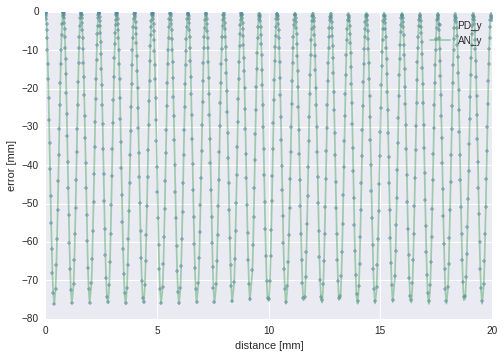

In [20]:
plt.plot(pdy[:,0], pdy[:,1], '.', label='PD_y', alpha=0.5)
plt.plot(pdy[:,0], analytic_solution(pdy[:,0])[1], label='AN_y', alpha=0.5)
plt.xlabel('distance [mm]')
plt.ylabel('error [mm]')
plt.xlim((0,20))
plt.legend()
plt.savefig(curr_dir+'PDy_vs_ANy_'+deltaQrel+'.png')

In [21]:
error_pdy = pdy[:,1] - analytic_solution(pdy[:,0])[1]
num_error_pdy = (error_pdy ** 2. ).sum() / error_pdy.size
print num_error_pdy

24.1251938535


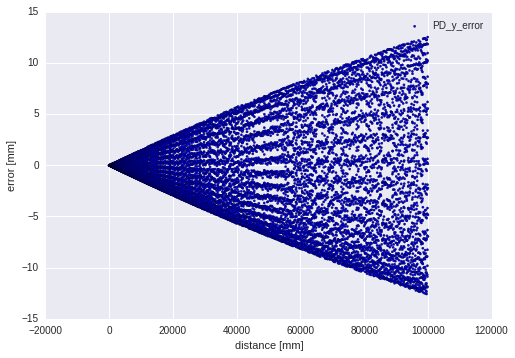

In [22]:
# Plot PD y_error vs distance
plt.scatter(pdy[:,0]*v, error_pdy, label='PD_y_error', marker='.')
plt.xlabel('distance [mm]')
plt.ylabel('error [mm]')
plt.legend()
plt.savefig(curr_dir+'PD_y_error_'+deltaQrel+'.png')

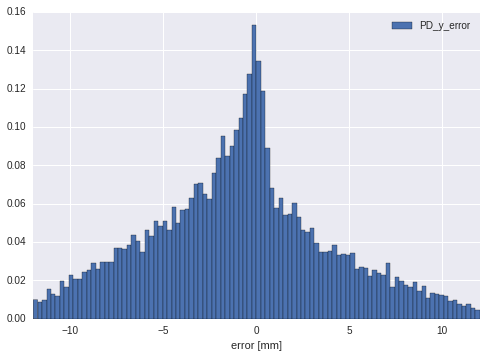

In [23]:
plt.hist(error_pdy, label='PD_y_error', bins=100, range=xlims, normed=True)
plt.xlabel('error [mm]')
plt.xlim(xlims)
plt.legend()
plt.savefig(curr_dir+'PD_y_error_hist_'+deltaQrel+'.png')

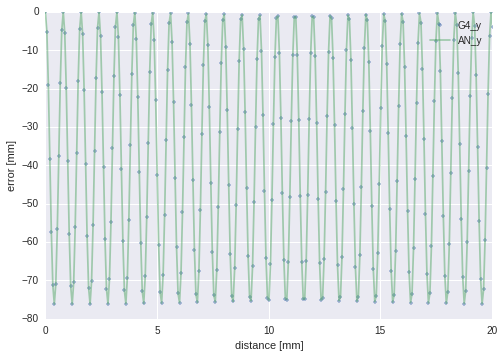

In [24]:
# Plot g4_y and analytic_y vs time
plt.plot(g4[:,3], g4[:,1], '.', label='G4_y', alpha=0.5)
plt.plot(g4[:,3], analytic_solution(g4[:,3])[1], label='AN_y', alpha=0.5)
plt.xlabel('distance [mm]')
plt.ylabel('error [mm]')
plt.xlim((0,20))
plt.legend()
plt.savefig(curr_dir+'G4y_vs_ANy.png')

In [25]:
error_g4y = g4[:,1] - analytic_solution(g4[:,3])[1]
num_error_g4y = (error_g4y ** 2. ).sum() / error_g4y.size
print num_error_g4y

0.0152811296366


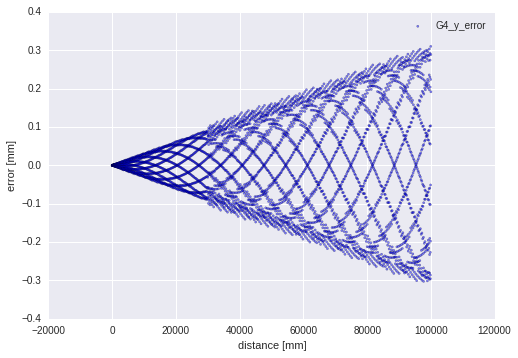

In [26]:
# Plot G4 y_error vs distance
plt.scatter(g4[:,3]*v, error_g4y, label='G4_y_error', marker='.', alpha=0.5)
plt.xlabel('distance [mm]')
plt.ylabel('error [mm]')
plt.legend()
plt.savefig(curr_dir+'G4_y_error.png')

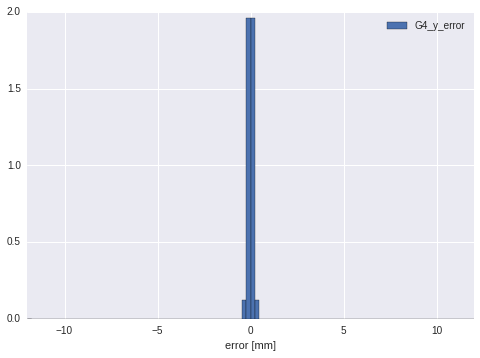

In [27]:
plt.hist(error_g4y, label='G4_y_error', bins=100, range=xlims, normed=True)
plt.xlabel('error [mm]')
plt.xlim(xlims)
plt.legend()
plt.savefig(curr_dir+'G4_y_error_hist_'+deltaQrel+'.png')

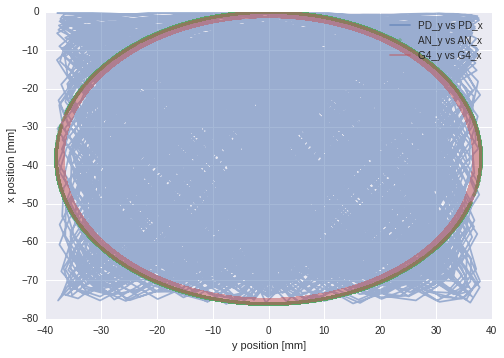

In [32]:
# Plot PD and analytic y vs x
num_points = min(pdx[:,1].size, pdy[:,1].size)
plt.plot(pdx[:,1][0:num_points], pdy[:,1][0:num_points], label='PD_y vs PD_x', alpha=0.5)
plt.plot(analytic_solution(pdx[:,0])[0], analytic_solution(pdx[:,0])[1], '.', label='AN_y vs AN_x', alpha=0.5)
plt.plot(g4[:,0], g4[:,1], label='G4_y vs G4_x', alpha=0.5)
plt.xlabel('y position [mm]')
plt.ylabel('x position [mm]')
plt.legend()
plt.savefig(curr_dir+'y_vs_x_'+deltaQrel+'.png')